In [455]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [456]:
df = pd.read_csv('dataframe_20k_290623.csv').drop(columns=['Unnamed: 0'])

In [457]:
df.head()

,locality,type of property,subtype of property,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP


In [458]:
df.rename(columns = {'type of property':'property_type', 'subtype of property':'property_subtype'}, inplace = True)
df.head()

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
0,Ham,HOUSE,VILLA,429500.0,4.0,215.0,INSTALLED,NaN,-1.0,NaN,NaN,True,NaN,1472,4,NaN,GOOD
1,Putte,HOUSE,HOUSE,599000.0,5.0,167.0,INSTALLED,NaN,-1.0,True,NaN,True,95.0,416,4,NaN,JUST_RENOVATED
2,IVOZ-RAMET,HOUSE,HOUSE,20000.0,3.0,130.0,INSTALLED,NaN,-1.0,True,NaN,NaN,NaN,182,3,NaN,GOOD
3,Herstal,HOUSE,HOUSE,45000.0,2.0,120.0,USA_INSTALLED,True,NaN,True,12.0,True,80.0,221,2,False,TO_BE_DONE_UP
4,Liege,HOUSE,HOUSE,109000.0,2.0,62.0,SEMI_EQUIPPED,False,NaN,NaN,NaN,NaN,NaN,45,2,False,TO_BE_DONE_UP


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19974 non-null  object 
 1   property_type     19974 non-null  object 
 2   property_subtype  19974 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           18077 non-null  object 
 7   furnished         9815 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      18209 non-null  object 
 14  number_facades    16438 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16589 non-null  object

In [460]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19974 non-null  object 
 1   property_type     19974 non-null  object 
 2   property_subtype  19974 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           18077 non-null  object 
 7   furnished         9815 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      18209 non-null  object 
 14  number_facades    16438 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16589 non-null  object

In [461]:
def analyze_column(df, column_name):
    column = df[column_name]
    num_nan = column.isnull().sum()
    num_unique = column.nunique()
    unique_values = column.unique()
    percentage_nan = (num_nan / len(column)) * 100
    percentage_unique = (num_unique / len(column)) * 100
    print(f"Analysis for column '{column_name}':")
    print(f"Number of NaN values: {num_nan}")
    print(f"Number of unique values: {num_unique}")
    print(f"Percentage of NaN values: {percentage_nan:.2f}%")
    print(f"Percentage of unique values: {percentage_unique:.2f}%")
    print(f"Unique values: {unique_values}")

In [462]:
def create_cat_plot(df,column, angle):
    sns.barplot(x=column, y="price", data=df)
    # Set labels and title
    plt.xlabel(f"{column}")
    plt.ylabel("Price (in euro)")
    plt.title(f"{column} vs. Price")
    plt.xticks(rotation=angle)
    # Show the plot
    plt.show()

In [463]:
def create_num_plot(df, column):
    sns.lineplot(x=column, y='price', data=df)
    plt.xlabel(f"{column}")
    plt.ylabel("Price (in euro)")
    plt.title(f"{column} vs. Price")
    # Show the plot
    plt.show()

In [464]:
df = df.dropna(how='all')

### 0. PRICE

In [465]:
# If we dont have a price - Delete the rows - not useable to predict pricing!

In [466]:
# This will be what we will need to predict
df['price'].info()
df.price.info()

<class 'pandas.core.series.Series'>
Index: 19974 entries, 0 to 19979
Series name: price
Non-Null Count  Dtype  
--------------  -----  
19499 non-null  float64
dtypes: float64(1)
memory usage: 312.1 KB
<class 'pandas.core.series.Series'>
Index: 19974 entries, 0 to 19979
Series name: price
Non-Null Count  Dtype  
--------------  -----  
19499 non-null  float64
dtypes: float64(1)
memory usage: 312.1 KB


In [467]:
# We have 475 rows with NaN as price - 2.38% of the total
analyze_column(df, 'price')

Analysis for column 'price':
Number of NaN values: 475
Number of unique values: 1624
Percentage of NaN values: 2.38%
Percentage of unique values: 8.13%
Unique values: [429500. 599000.  20000. ... 381500. 351000. 176000.]


In [468]:
df[df['price'].isna()]
# Most values are not Filled in (NaN) so I decide to drop all of these 475 rows

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
47,Roeselare,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
90,Evere,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
181,Balen,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
182,HERSELT,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
183,WITGOOR,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18901,Mons,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
19186,Borgloon,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
19537,Borgloon,APARTMENT_GROUP,APARTMENT_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
19718,Dessel,HOUSE_GROUP,HOUSE_GROUP,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN


In [469]:
df = df.dropna(subset=['price'])

In [470]:
df[df['price'].isna()]
# ALL NaN Values are dropped

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state


In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19499 entries, 0 to 19979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19499 non-null  object 
 1   property_type     19499 non-null  object 
 2   property_subtype  19499 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           17602 non-null  object 
 7   furnished         9756 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      17734 non-null  object 
 14  number_facades    15963 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16114 non-null  object 
dty

In [472]:
# Resetting index to have nice looking dataframe
df.reset_index(inplace=True, drop=True)

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19499 entries, 0 to 19498
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locality          19499 non-null  object 
 1   property_type     19499 non-null  object 
 2   property_subtype  19499 non-null  object 
 3   price             19499 non-null  float64
 4   number_rooms      19499 non-null  float64
 5   living_area       18445 non-null  float64
 6   kitchen           17602 non-null  object 
 7   furnished         9756 non-null   object 
 8   fireplace         6176 non-null   float64
 9   terrace           12887 non-null  object 
 10  terrace_area      7391 non-null   float64
 11  garden            9078 non-null   object 
 12  garden_area       5916 non-null   float64
 13  surface_land      17734 non-null  object 
 14  number_facades    15963 non-null  object 
 15  swimming_pool     10256 non-null  object 
 16  building_state    16114 non-null  object

### 1. LOCALITY

In [474]:
# LOOK TO MAKE THIS A GEO COORDINATION
analyze_column(df, 'locality')

Analysis for column 'locality':
Number of NaN values: 0
Number of unique values: 2589
Percentage of NaN values: 0.00%
Percentage of unique values: 13.28%
Unique values: ['Ham' 'Putte' 'IVOZ-RAMET' ... 'Louveigné' 'GrÃce-Hollogne' 'Schoonaarde']


In [475]:
df['locality'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19499 entries, 0 to 19498
Series name: locality
Non-Null Count  Dtype 
--------------  ----- 
19499 non-null  object
dtypes: object(1)
memory usage: 152.5+ KB


### 2. Property Type 

In [476]:
analyze_column(df, 'property_type')

Analysis for column 'property_type':
Number of NaN values: 0
Number of unique values: 2
Percentage of NaN values: 0.00%
Percentage of unique values: 0.01%
Unique values: ['HOUSE' 'APARTMENT']


In [477]:
# LOOKS OK, NO NAN Values
df['property_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19499 entries, 0 to 19498
Series name: property_type
Non-Null Count  Dtype 
--------------  ----- 
19499 non-null  object
dtypes: object(1)
memory usage: 152.5+ KB


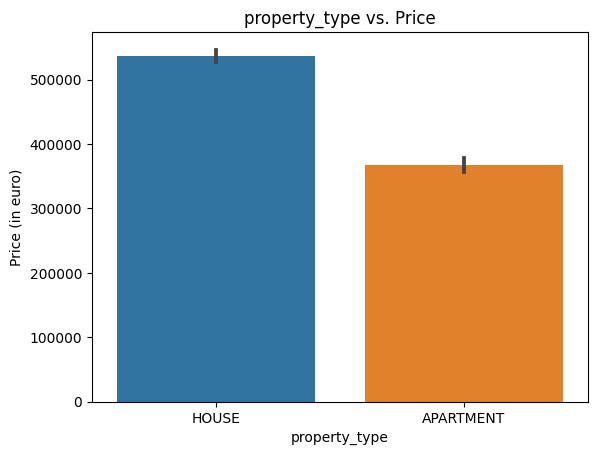

In [478]:
create_cat_plot(df, 'property_type', 0)

### 3. Property Subtype

In [479]:
analyze_column(df, 'property_subtype')

Analysis for column 'property_subtype':
Number of NaN values: 0
Number of unique values: 23
Percentage of NaN values: 0.00%
Percentage of unique values: 0.12%
Unique values: ['VILLA' 'HOUSE' 'APARTMENT_BLOCK' 'CHALET' 'COUNTRY_COTTAGE' 'APARTMENT'
 'FLAT_STUDIO' 'MIXED_USE_BUILDING' 'EXCEPTIONAL_PROPERTY' 'TOWN_HOUSE'
 'PENTHOUSE' 'DUPLEX' 'GROUND_FLOOR' 'MANSION' 'BUNGALOW' 'OTHER_PROPERTY'
 'CASTLE' 'SERVICE_FLAT' 'LOFT' 'KOT' 'TRIPLEX' 'FARMHOUSE' 'MANOR_HOUSE']


In [480]:
df['property_subtype'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19499 entries, 0 to 19498
Series name: property_subtype
Non-Null Count  Dtype 
--------------  ----- 
19499 non-null  object
dtypes: object(1)
memory usage: 152.5+ KB


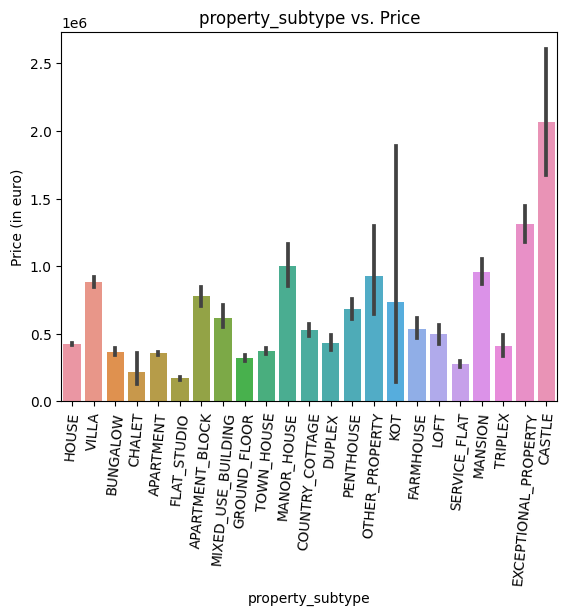

In [481]:
df_sorted = df.sort_values(by='price', ascending=True)
create_cat_plot(df_sorted, 'property_subtype', 85)

### 4. Number of Rooms

In [482]:
analyze_column(df, 'number_rooms')

Analysis for column 'number_rooms':
Number of NaN values: 0
Number of unique values: 29
Percentage of NaN values: 0.00%
Percentage of unique values: 0.15%
Unique values: [ 4.  5.  3.  2.  1.  0.  6.  7. 25. 17. 10. 12.  8.  9. 11. 27. 14. 21.
 13. 16. 30. 15. 18. 46. 24. 19. 22. 60. 20.]


In [489]:
df['number_rooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19499 entries, 0 to 19498
Series name: number_rooms
Non-Null Count  Dtype  
--------------  -----  
19499 non-null  float64
dtypes: float64(1)
memory usage: 152.5 KB


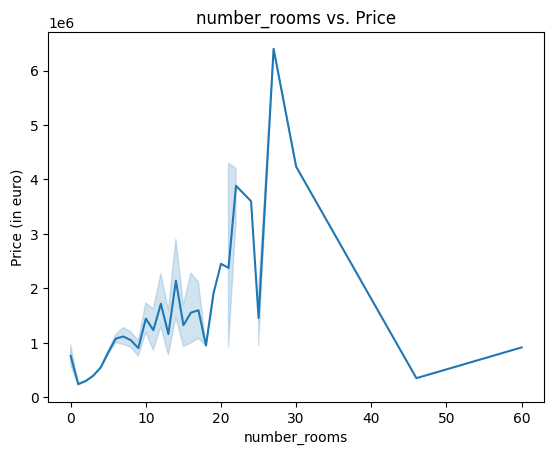

In [491]:
create_num_plot(df, 'number_rooms')

<Axes: xlabel='number_rooms', ylabel='Count'>

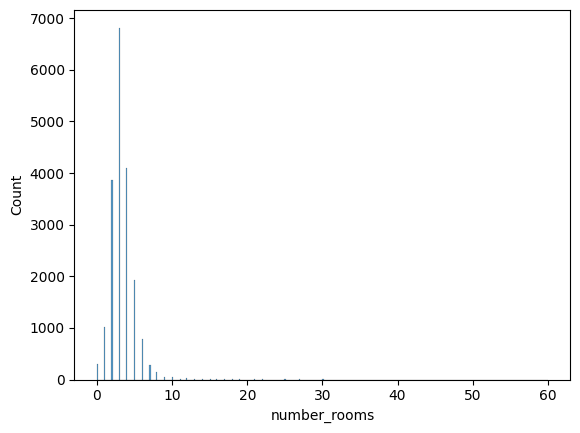

In [493]:
sns.histplot(df, x='number_rooms')

### 5. Living Area

In [484]:
analyze_column(df, 'living_area')

Analysis for column 'living_area':
Number of NaN values: 1054
Number of unique values: 725
Percentage of NaN values: 5.41%
Percentage of unique values: 3.72%
Unique values: [2.1500e+02 1.6700e+02 1.3000e+02 1.2000e+02 6.2000e+01 8.0000e+01
 1.7500e+02 9.0000e+01 4.4000e+01 1.4000e+02 1.0800e+02 6.6000e+01
 1.4600e+02 1.3500e+02 1.1000e+02 1.6400e+02 1.6800e+02 1.2500e+02
 2.1600e+02 1.6000e+02 1.0000e+02 8.1000e+01 1.8000e+02 1.8100e+02
 9.4000e+01 1.7100e+02 1.2200e+02 1.0400e+02 2.2900e+02 5.2600e+02
 1.0500e+02 9.5000e+01 2.5400e+02 1.6600e+02 3.7500e+02        nan
 2.2000e+02 1.4800e+02 8.5000e+01 9.9000e+01 2.4000e+02 3.6000e+01
 1.0600e+02 7.2000e+01 8.7000e+01 8.9000e+01 1.0300e+02 1.4500e+02
 2.5800e+02 2.5000e+02 3.2000e+02 2.5100e+02 2.1000e+02 2.8600e+02
 1.9000e+02 2.0000e+02 1.5500e+02 4.0500e+02 1.8800e+02 2.5300e+02
 2.7000e+02 7.6000e+01 1.0200e+02 2.2000e+01 3.9200e+02 1.3400e+02
 8.4000e+01 3.8800e+02 6.0000e+01 3.1100e+02 1.6100e+02 9.1000e+01
 5.7000e+01 1.8500e+02 

In [485]:
# Theres quite a bit of Nan Values (5.41%)- checking these out 
#(we could backfill the NaN values with the mean of the Living_ area per property_subtype)
df[df['living_area'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state
43,Maldegem,HOUSE,HOUSE,270000.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755,NaN,False,TO_RENOVATE
46,Lichtervelde,HOUSE,HOUSE,225000.0,4.0,NaN,0,False,NaN,True,NaN,True,NaN,190,NaN,False,TO_RENOVATE
55,Tisselt,APARTMENT,APARTMENT,185000.0,1.0,NaN,INSTALLED,False,NaN,True,26.0,True,NaN,NaN,2,False,GOOD
91,Brugge,APARTMENT,APARTMENT,273900.0,2.0,NaN,0,NaN,NaN,True,NaN,NaN,NaN,UNKNOWN,UNKNOWN,NaN,UNKNOWN
93,Wetteren,HOUSE,HOUSE,323500.0,4.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,160,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19435,Grivegnée,APARTMENT,APARTMENT,145000.0,1.0,NaN,INSTALLED,NaN,-1.0,True,5.0,NaN,NaN,UNKNOWN,2,NaN,NaN
19438,Beyne-Heusay,HOUSE,EXCEPTIONAL_PROPERTY,745000.0,3.0,NaN,INSTALLED,False,NaN,True,17.0,True,174.0,10566,4,False,GOOD
19480,Waasmunster,HOUSE,HOUSE,549000.0,5.0,NaN,0,NaN,NaN,NaN,NaN,True,NaN,0,NaN,False,AS_NEW
19493,Molenbeek-Saint-Jean,HOUSE,EXCEPTIONAL_PROPERTY,369000.0,5.0,NaN,INSTALLED,False,NaN,NaN,NaN,NaN,NaN,0,2,False,GOOD


In [486]:
# backfill the NaN values with the mean of the Living_area per property_subtype
mean_living_area = df.groupby('property_subtype')['living_area'].transform('mean')
#  Transform function is used to calculate the mean living area for each property subtype.
mean_living_area

0        289.694260
1        195.894535
2        195.894535
3        195.894535
4        195.894535
            ...    
19494    195.894535
19495     99.713227
19496    195.894535
19497    195.894535
19498     99.713227
Name: living_area, Length: 19499, dtype: float64

In [487]:
filled_nan_living_area = df.groupby('property_subtype')['living_area'].fillna(mean_living_area)
df['living_area'] = filled_nan_living_area

In [488]:
df[df['living_area'].isna()]

,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,terrace,terrace_area,garden,garden_area,surface_land,number_facades,swimming_pool,building_state


### 6. Kitchen

### 7. Furnished

### 8. Fireplace

### 9. Terrace

### 10. Terrace Area

### 11. Garden

### 12. Garden Area

### 13. Surface of the Land

### 14. Number of Facades

### 15. Swimming Pool

### 16. Building State